In [64]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [65]:
train=pd.read_csv("train.csv")
test=pd.read_csv("test.csv")

In [66]:
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [67]:
%matplotlib inline

In [68]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


In [69]:
train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [70]:
train.isnull().sum()/len('train')*100

PassengerId        0.0
Survived           0.0
Pclass             0.0
Name               0.0
Sex                0.0
Age             3540.0
SibSp              0.0
Parch              0.0
Ticket             0.0
Fare               0.0
Cabin          13740.0
Embarked          40.0
dtype: float64

In [71]:
test.isnull().sum()/len('test')*100

PassengerId       0.0
Pclass            0.0
Name              0.0
Sex               0.0
Age            2150.0
SibSp             0.0
Parch             0.0
Ticket            0.0
Fare             25.0
Cabin          8175.0
Embarked          0.0
dtype: float64

male      577
female    314
Name: Sex, dtype: int64

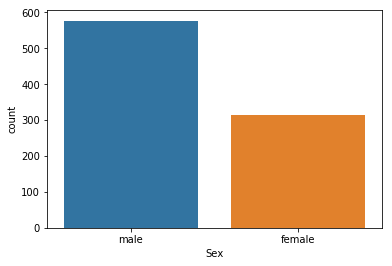

In [72]:
sns.countplot('Sex',data=train)
train['Sex'].value_counts()

,Sex,Survived
0,female,0.742038
1,male,0.188908


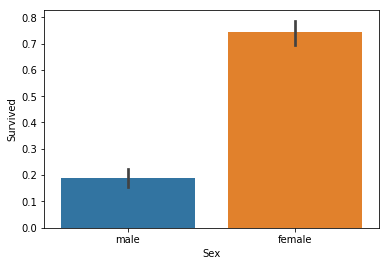

In [73]:
sns.barplot(x='Sex',y='Survived',data=train)
train.groupby('Sex',as_index=False).Survived.mean()

,Pclass,Survived
0,1,0.629630
1,2,0.472826
2,3,0.242363


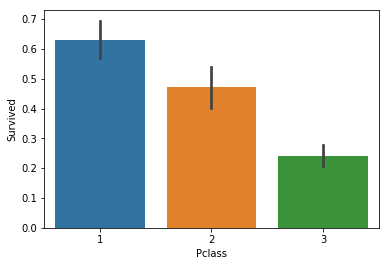

In [74]:
sns.barplot(x='Pclass',y='Survived',data=train)
train.groupby('Pclass',as_index=False).Survived.mean()

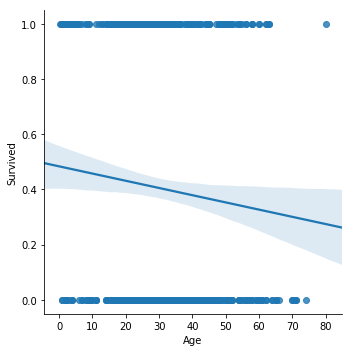

In [75]:
sns.lmplot(x='Age',y='Survived',data=train)

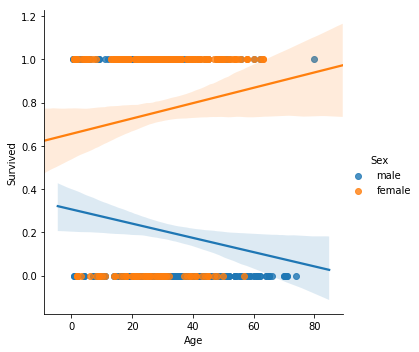

In [76]:
sns.lmplot(x='Age',y='Survived',data=train,hue='Sex')

In [77]:
drop_list=['Cabin','Ticket','PassengerId']

train = train.drop(drop_list,axis=1)
test_passenger_df = pd.DataFrame(test.PassengerId)
test = test.drop(drop_list,axis=1)

test_passenger_df.head()


,PassengerId
0,892
1,893
2,894
3,895
4,896


In [78]:
train.Embarked.fillna("S",inplace=True)

In [79]:
train.Age.median()

28.0

In [80]:
test.Fare.fillna(test.Fare.median(),inplace=True)

In [81]:
combined=[train,test]
combined

[     Survived  Pclass                                               Name  \
 0           0       3                            Braund, Mr. Owen Harris   
 1           1       1  Cumings, Mrs. John Bradley (Florence Briggs Th...   
 2           1       3                             Heikkinen, Miss. Laina   
 3           1       1       Futrelle, Mrs. Jacques Heath (Lily May Peel)   
 4           0       3                           Allen, Mr. William Henry   
 5           0       3                                   Moran, Mr. James   
 6           0       1                            McCarthy, Mr. Timothy J   
 7           0       3                     Palsson, Master. Gosta Leonard   
 8           1       3  Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)   
 9           1       2                Nasser, Mrs. Nicholas (Adele Achem)   
 10          1       3                    Sandstrom, Miss. Marguerite Rut   
 11          1       1                           Bonnell, Miss. Elizabeth   

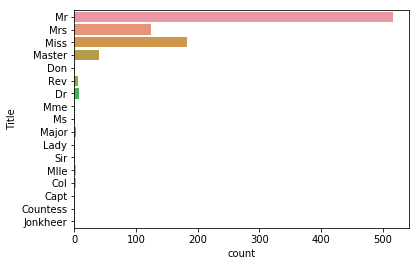

In [82]:
for dataset in combined:
    dataset['Title'] = dataset.Name.str.extract(' ([A-Za-z]+)\.', expand=False)
sns.countplot(y='Title',data=train) 

In [83]:
for dataset in combined:
    dataset['Title'] = dataset['Title'].replace(['Lady', 'Countess','Capt', 'Col',\
     'Don', 'Dr', 'Major', 'Rev', 'Sir', 'Jonkheer', 'Dona'], 'Special')

    dataset['Title'] = dataset['Title'].replace({'Mlle':'Miss','Ms':'Miss','Mme':'Mrs'})
    
train.groupby('Title',as_index=False)['Survived'].mean().sort_values(by='Survived',ascending=False)

,Title,Survived
3,Mrs,0.793651
1,Miss,0.702703
0,Master,0.575000
4,Special,0.347826
2,Mr,0.156673


In [84]:
title_mapping = {"Mr": 1, "Miss": 2, "Mrs": 3, "Master": 4, "Special": 5}
for dataset in combined:
    dataset['Title'] = dataset.Title.map(title_mapping)
    dataset['Title'] = dataset.Title.fillna(0)

In [85]:
for dataset in combined:
    dataset["Family"] = dataset['SibSp'] + dataset['Parch']
    dataset["IsAlone"] = np.where(dataset["Family"] > 0, 0,1)
    dataset.drop('Family',axis=1,inplace=True)
train.head()    

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked,Title,IsAlone
0,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,7.2500,S,1,0
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,71.2833,C,3,0
2,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,7.9250,S,2,1
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,53.1000,S,3,0
4,0,3,"Allen, Mr. William Henry",male,35.0,0,0,8.0500,S,1,1


In [92]:
for dataset in combined:
    dataset.drop(['SibSp','Parch','Name'],axis=1,inplace=True)  

In [93]:
for dataset in combined:
    dataset["IsMinor"] = np.where(dataset["Age"] < 15, 1, 0)
combined

[     Survived  Pclass     Sex   Age      Fare Embarked  Title  IsAlone  \
 0           0       3    male  22.0    7.2500        S      1        0   
 1           1       1  female  38.0   71.2833        C      3        0   
 2           1       3  female  26.0    7.9250        S      2        1   
 3           1       1  female  35.0   53.1000        S      3        0   
 4           0       3    male  35.0    8.0500        S      1        1   
 5           0       3    male   NaN    8.4583        Q      1        1   
 6           0       1    male  54.0   51.8625        S      1        1   
 7           0       3    male   2.0   21.0750        S      4        0   
 8           1       3  female  27.0   11.1333        S      3        0   
 9           1       2  female  14.0   30.0708        C      3        0   
 10          1       3  female   4.0   16.7000        S      2        0   
 11          1       1  female  58.0   26.5500        S      2        1   
 12          0       3   

In [94]:
train['oldfemale']=(train['Age']>50)&(train['Sex']=='Female')
train['oldfemale'] = train['oldfemale'].astype(int)
test['oldfemale']=(test['Age']>50)&(test['Sex']=='Female')
test['oldfemale'] = test['oldfemale'].astype(int)

In [95]:
train1=pd.get_dummies(train,columns=['Pclass','Embarked','Sex'],drop_first=True)
test1=pd.get_dummies(test,columns=['Pclass','Embarked','Sex'],drop_first=True)

In [96]:
train1.head()

,Survived,Age,Fare,Title,IsAlone,IsMinor,oldfemale,Pclass_2,Pclass_3,Embarked_Q,Embarked_S,Sex_male
0,0,22.0,7.2500,1,0,0,0,0,1,0,1,1
1,1,38.0,71.2833,3,0,0,0,0,0,0,0,0
2,1,26.0,7.9250,2,1,0,0,0,1,0,1,0
3,1,35.0,53.1000,3,0,0,0,0,0,0,1,0
4,0,35.0,8.0500,1,1,0,0,0,1,0,1,1


In [97]:
train1['ageband']=pd.qcut(train1['Age'],4,labels=False)
test1['ageband']=pd.qcut(test1['Age'],4,labels=False)

In [98]:
train1['fareband']=pd.qcut(train1['Fare'],4,labels=False)
test1['fareband']=pd.qcut(test1['Fare'],4,labels=False)

In [99]:
train1.drop(['Age','Fare'],axis=1,inplace=True)
test1.drop(['Age','Fare'],axis=1,inplace=True)

In [100]:
train1.head()

,Survived,Title,IsAlone,IsMinor,oldfemale,Pclass_2,Pclass_3,Embarked_Q,Embarked_S,Sex_male,ageband,fareband
0,0,1,0,0,0,0,1,0,1,1,1.0,0
1,1,3,0,0,0,0,0,0,0,0,2.0,3
2,1,2,1,0,0,0,1,0,1,0,1.0,1
3,1,3,0,0,0,0,0,0,1,0,2.0,3
4,0,1,1,0,0,0,1,0,1,1,2.0,1


In [102]:
train1.head()

,Survived,Title,IsAlone,IsMinor,oldfemale,Pclass_2,Pclass_3,Embarked_Q,Embarked_S,Sex_male,ageband,fareband
0,0,1,0,0,0,0,1,0,1,1,1.0,0
1,1,3,0,0,0,0,0,0,0,0,2.0,3
2,1,2,1,0,0,0,1,0,1,0,1.0,1
3,1,3,0,0,0,0,0,0,1,0,2.0,3
4,0,1,1,0,0,0,1,0,1,1,2.0,1


In [104]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.metrics import accuracy_score

In [110]:
x=train1.drop("Survived",axis=1)
y=train1["Survived"]
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.3,random_state=42)


In [111]:
decisiontree = DecisionTreeClassifier()
dep = np.arange(1,10)
param_grid = {'max_depth' : dep}

clf_cv = GridSearchCV(decisiontree, param_grid=param_grid, cv=5)

clf_cv.fit(X, y)
clf_cv.best_params_,clf_cv.best_score_*100
print('Best value of max_depth:',clf_cv.best_params_)
print('Best score:',clf_cv.best_score_*100)

Best value of max_depth: {'max_depth': 3}
Best score: 68.79910213243546


C:\Users\Pihu\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)
